In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gaussian clustering libraries:
from sklearn.mixture import GaussianMixture
from matplotlib import cm

In [2]:
# Load in CSV data of best overall offensive players per season:
o_df = pd.read_csv('../../clean_data/top_overall_offensive_player_data.csv')

In [3]:
o_df.head()  # preview first 5 rows

,Rank,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,FumblesLost,FantasyPointsPerGame,FantasyPoints,Year
0,1,Patrick Mahomes,KC,QB,16,5097,50,12,272,2,0,0,0,2,26.1,417.08,2018
1,2,Matt Ryan,ATL,QB,16,4924,35,7,125,3,1,5,1,5,22.1,353.96,2018
2,3,Ben Roethlisberger,PIT,QB,16,5129,34,16,98,3,1,-1,0,2,21.3,340.86,2018
3,4,Deshaun Watson,HOU,QB,16,4165,26,9,551,5,0,0,0,3,20.7,331.70,2018
4,5,Andrew Luck,IND,QB,16,4593,39,15,148,0,1,4,0,1,20.4,326.92,2018


In [4]:
o_df['Position'].value_counts()  # preview number of players in each position

WR    476
RB    340
TE    187
QB    184
FB     13
Name: Position, dtype: int64

In [5]:
o_df.shape  # 300 best overall players in the 2015, 2016, 2017, and 2018 NFL seasons

(1200, 17)

In [6]:
# Function to apply coloring to players based on positions:
def color_positions(pos):
    if pos == 'WR':
        return 'red'
    if pos == 'RB':
        return 'blue'
    if pos == 'TE':
        return 'orange'
    if pos == 'QB':
        return 'green'
    if pos == 'FB':
        return 'yellow'
    else:
        return 'black'

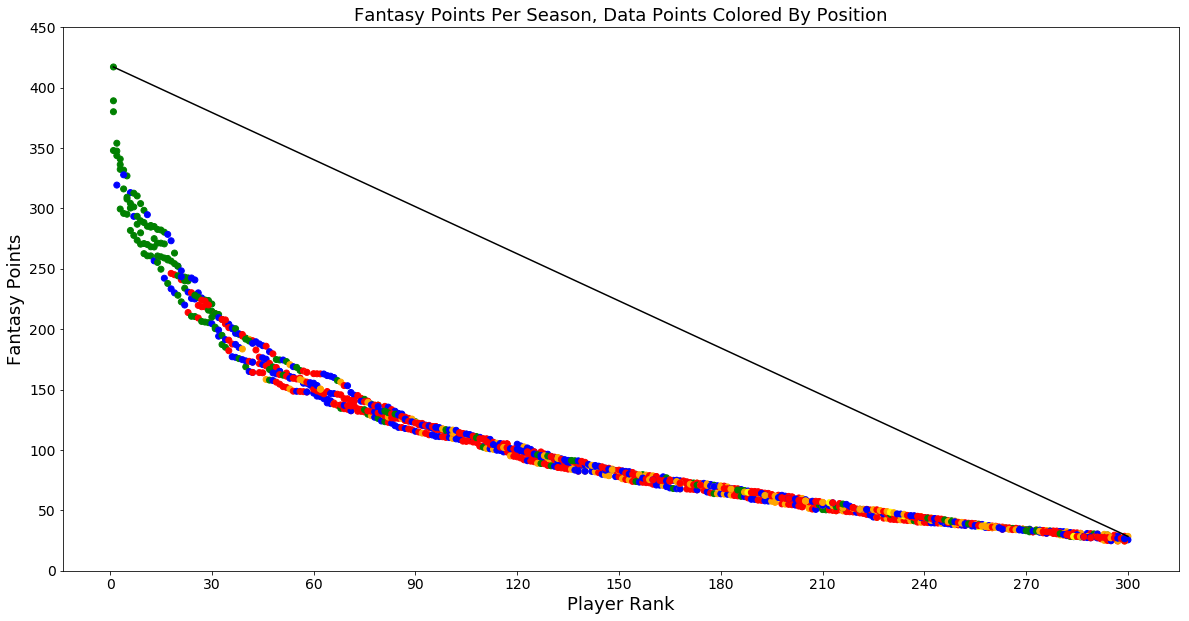

In [7]:
# Plot of player fantasy performance per season, colored by position:
plt.figure(figsize = (20, 10))
plt.scatter(o_df['Rank'], o_df['FantasyPoints'], c = o_df['Position'].apply(color_positions))

# Line to represent linear relationship between best player and worst player:
plt.plot([o_df.loc[0]['Rank'], o_df.loc[299]['Rank']], 
         [o_df.loc[0]['FantasyPoints'], o_df.loc[299]['FantasyPoints']], color = 'black')

plt.title('Fantasy Points Per Season, Data Points Colored By Position', fontsize=18)  # title
plt.ylabel('Fantasy Points', fontsize=18)  # y-axis label
plt.xlabel('Player Rank', fontsize=18)     # x-axis label
plt.xticks(np.arange(0, 301, step=30), size=14)   # format x-axis ticks
plt.yticks(np.arange(0, 451, step=50), size=14)   # format y-axis ticks

plt.savefig('../../images/initial_clustering_2015_2018.png')  # save figure as PNG file
plt.show();  # display plot

In [8]:
# Read in best overall performance by player in 2015, 2016, 2017, and 2018 CSV data:
o_18 = pd.read_csv('../../clean_data/best_o_players_2018_season.csv')
o_17 = pd.read_csv('../../clean_data/best_o_players_2017_season.csv')
o_16 = pd.read_csv('../../clean_data/best_o_players_2016_season.csv')
o_15 = pd.read_csv('../../clean_data/best_o_players_2015_season.csv')

In [9]:
# Function to plot Gaussian Mixture Model clustering results:
def gauss_mix_plotter(df, col_1, col_2, clusters = 10, is_year = True):
    
    # Get the season year(s) from the DataFrame:
    try:
        year = df['Year'].unique()
    except:
        is_year = False
        
    # Create plot title for each subplot:
    if is_year:
        chart_2d_title = (f'{year} Season Fit To {col_1} & {col_2}; 2-D Gaussian Clustering'.format(col_1, col_2, year))
        chart_1d_1_title = (f'{year} Season Fit To {col_1} Feature; 1-D Gaussian Clustering'.format(year, col_1))
        chart_1d_2_title = (f'{year} Season Fit To {col_2} Feature; 1-D Gaussian Clustering'.format(year, col_2))
    else:
        chart_2d_title = (f'Model Fit To {col_1} & {col_2}; 2-D Gaussian Clustering'.format(col_1, col_2))
        chart_1d_1_title = (f'Model Fit To {col_1} Feature; 1-D Gaussian Clustering'.format(col_1))
        chart_1d_2_title = (f'Model Fit To {col_2} Feature; 1-D Gaussian Clustering'.format(col_2))
        
    # Instantiate, fit, and predict 2-Dimensional GMM using both columns:
    g_mix_2d = GaussianMixture(n_components = clusters, random_state = 42)
    g_mix_2d.fit(df[[col_1, col_2]])
    g_mix_2d_cluster = g_mix_2d.predict(df[[col_1, col_2]])
    
    # Instantiate, fit, and predict 1-Dimensional GMM using the first column (col_1):
    g_mix_1d_1 = GaussianMixture(n_components = clusters, random_state = 42)
    g_mix_1d_1.fit(df[[col_1]])
    g_mix_1d_1_cluster = g_mix_1d_1.predict(df[[col_1]])
    
    # Instantiate, fit, and predict 1-Dimensional GMM using the second column (col_2):
    g_mix_1d_2 = GaussianMixture(n_components = clusters, random_state = 42)
    g_mix_1d_2.fit(df[[col_2]])
    g_mix_1d_2_cluster = g_mix_1d_2.predict(df[[col_2]])
    
    plt.figure(figsize = (15, 21))
    
    # Plot 2-D GMM clusters for both columns:
    plt.subplot(3,1,1) 
    plt.scatter(df[col_1], df[col_2], c = [cm.rainbow(clust/clusters) for clust in g_mix_2d_cluster])
    plt.title(chart_2d_title, fontsize=16)
    plt.xlabel(col_1, fontsize=16)
    plt.ylabel(col_2, fontsize=16)
    plt.xticks(np.arange(0, 301, step=30), size=14)
    
    if col_2 == 'FantasyPointsPerGame':
        plt.yticks(np.arange(0, 41, step=5), size=14)
    else:
        plt.yticks(np.arange(0, 451, step=50), size=14)
    
    # Plot 1-D GMM clusters for col_1:
    plt.subplot(3,1,2) 
    plt.scatter(df[col_1], df[col_2], c = [cm.rainbow(clust/clusters) for clust in g_mix_1d_1_cluster])
    plt.title(chart_1d_1_title, fontsize=16)
    plt.xlabel(col_1, fontsize=16)
    plt.ylabel(col_2, fontsize=16)
    plt.xticks(np.arange(0, 301, step=30), size=14)
    
    if col_2 == 'FantasyPointsPerGame':
        plt.yticks(np.arange(0, 41, step=5), size=14)
    else:
        plt.yticks(np.arange(0, 451, step=50), size=14)
    
    # Plot 1-D GMM clusters for col_2:
    plt.subplot(3,1,3) 
    plt.scatter(df[col_1], df[col_2], c = [cm.rainbow(clust/clusters) for clust in g_mix_1d_2_cluster])
    plt.title(chart_1d_2_title, fontsize=16)
    plt.xlabel(col_1, fontsize=16)
    plt.ylabel(col_2, fontsize=16)
    
    if col_2 == 'FantasyPointsPerGame':
        plt.yticks(np.arange(0, 41, step=5), size=14)
    else:
        plt.yticks(np.arange(0, 451, step=50), size=14)
        
    plt.xticks(np.arange(0, 301, step=30), size=14)
    
    # Format Names
    col_1_name = '1D_cluster_' + str(col_1)
    col_2_name = '1D_cluster_' + str(col_2)
    col_2d_name = '2D_cluster_' + str(col_2)
    
    df[col_2d_name] = g_mix_2d_cluster
    
    file_name = '../../images/gmm_' + col_1_name + col_2_name + '_2d_clustering_' + str(year) + '.png'
    plt.savefig(file_name)
    
    # Display the subplots:
    plt.show()
    
    return df 

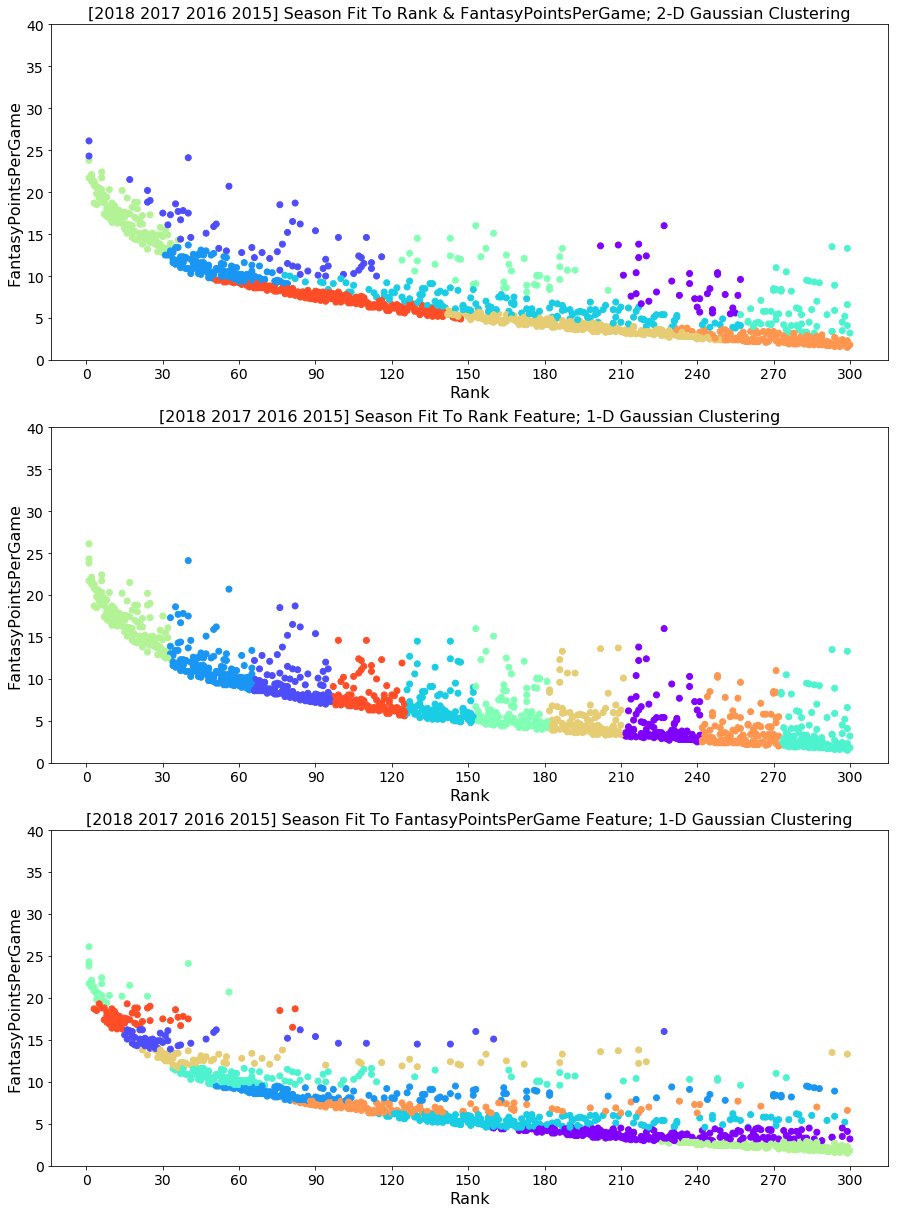

In [10]:
# Generate Gaussian Mixture cluster plots for best overall players in the 2015, 2016, 2017, and 2018 NFL season:
o_df_per_game = gauss_mix_plotter(o_df, 'Rank', 'FantasyPointsPerGame', 10)

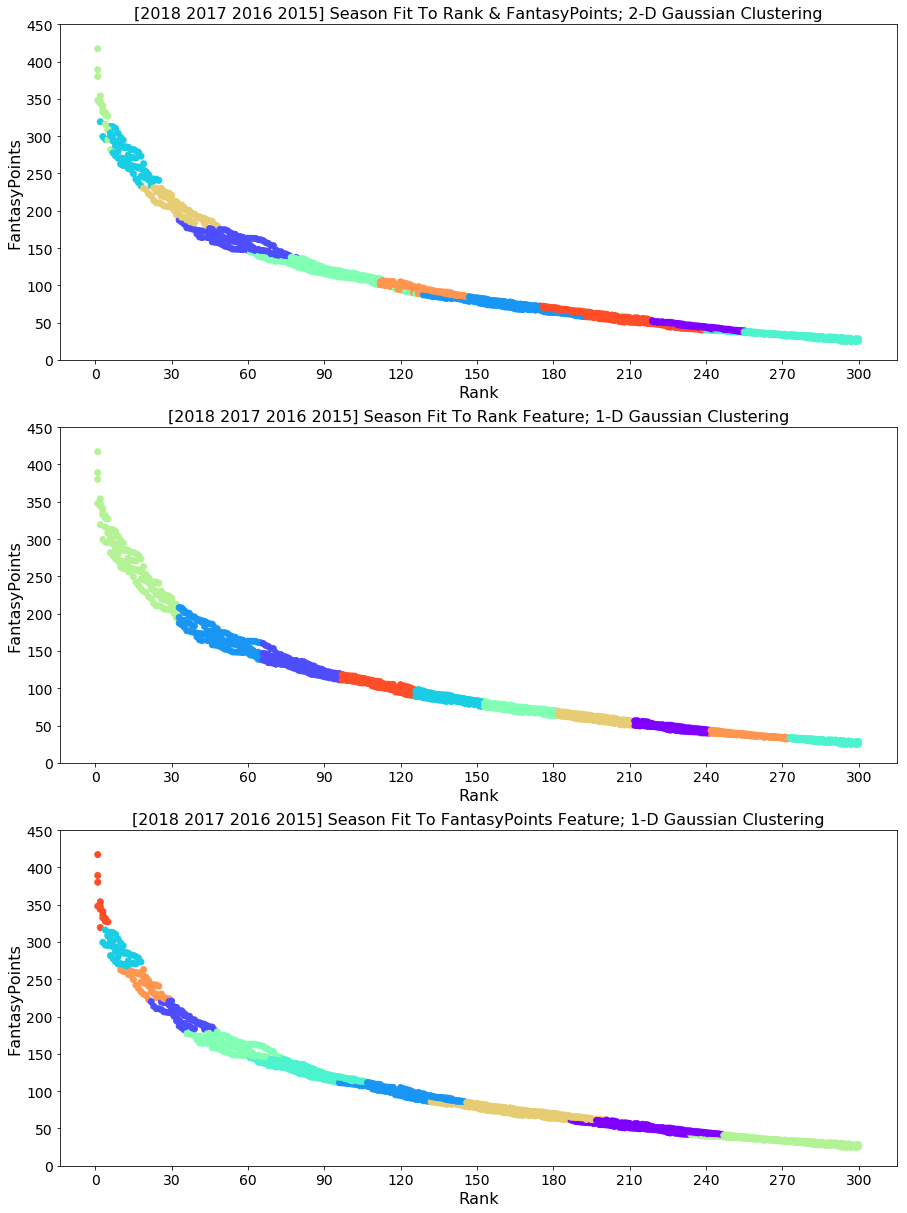

In [11]:
# Generate Gaussian Mixture cluster plots for best overall players in the 2015, 2016, 2017, and 2018 NFL season:
o_df = gauss_mix_plotter(o_df, 'Rank', 'FantasyPoints', 10)

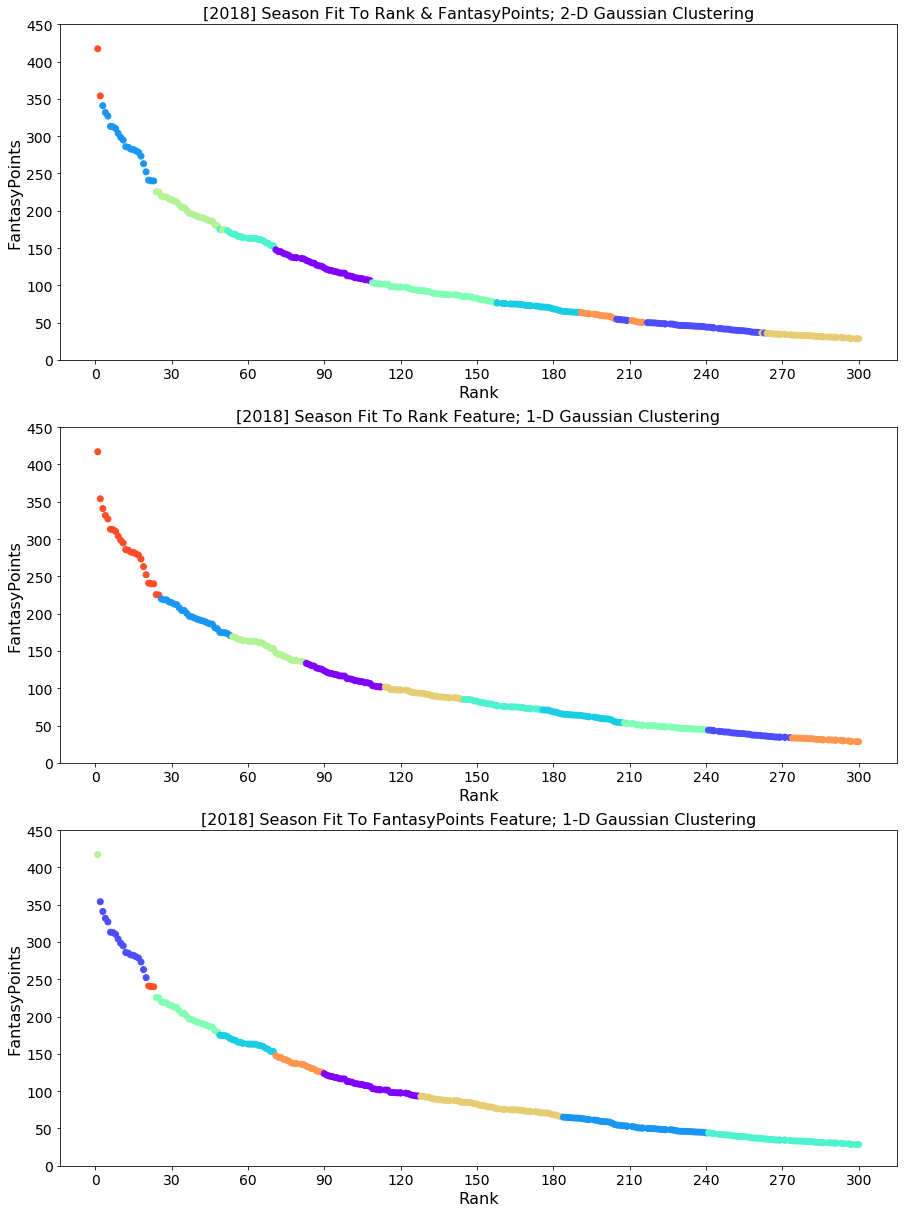

In [12]:
# Generate Gaussian Mixture cluster plots for best overall players in the 2018 NFL season:
o_18 = gauss_mix_plotter(o_18, 'Rank', 'FantasyPoints', 10)

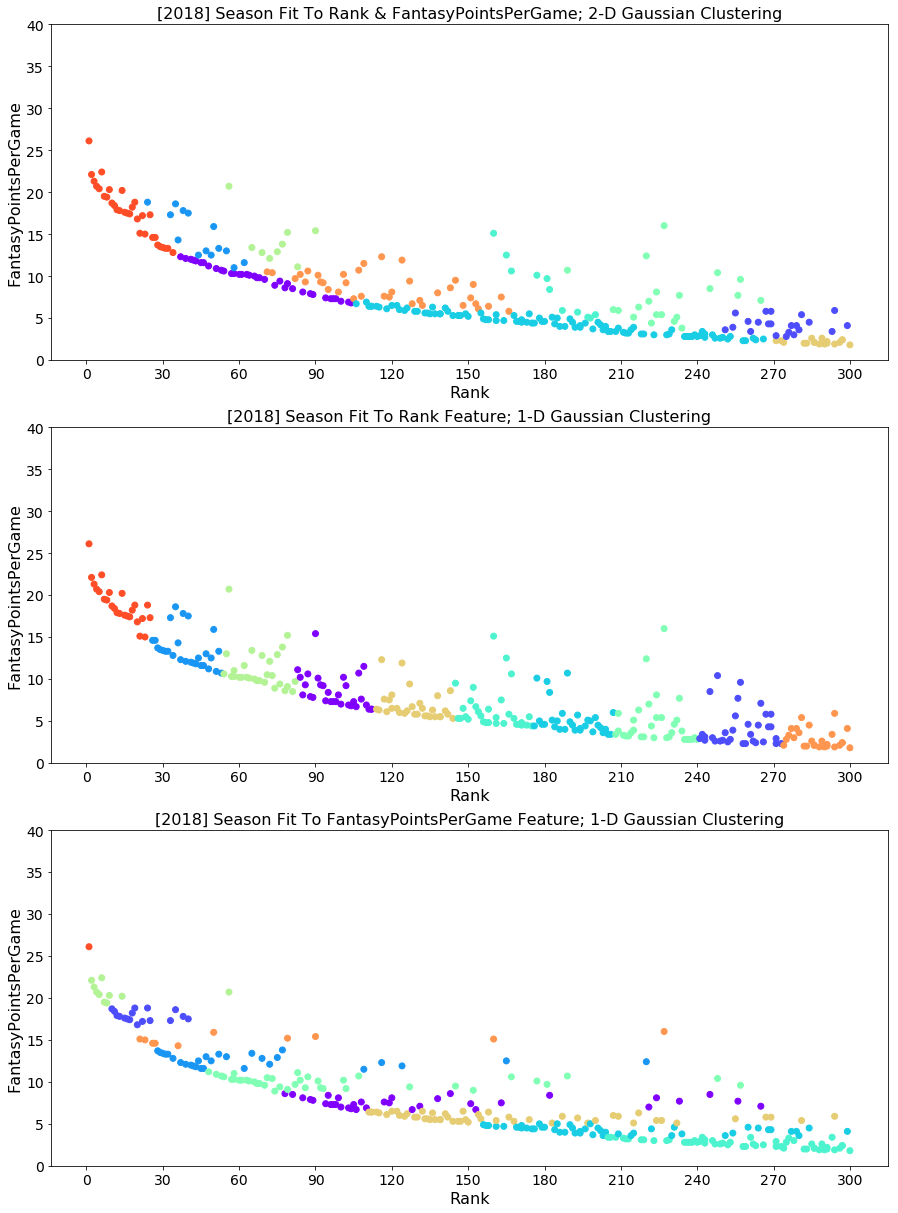

In [13]:
# Generate Gaussian Mixture cluster plots for best overall players in the 2018 NFL season:
o_18_per_game = gauss_mix_plotter(o_18, 'Rank', 'FantasyPointsPerGame', 10)

In [14]:
o_18_per_game.head()

,Rank,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,FumblesLost,FantasyPointsPerGame,FantasyPoints,Year,2D_cluster_FantasyPoints,2D_cluster_FantasyPointsPerGame
0,1,Patrick Mahomes,KC,QB,16,5097,50,12,272,2,0,0,0,2,26.1,417.08,2018,9,9
1,2,Matt Ryan,ATL,QB,16,4924,35,7,125,3,1,5,1,5,22.1,353.96,2018,9,9
2,3,Ben Roethlisberger,PIT,QB,16,5129,34,16,98,3,1,-1,0,2,21.3,340.86,2018,2,9
3,4,Deshaun Watson,HOU,QB,16,4165,26,9,551,5,0,0,0,3,20.7,331.70,2018,2,9
4,5,Andrew Luck,IND,QB,16,4593,39,15,148,0,1,4,0,1,20.4,326.92,2018,2,9


In [15]:
name_list = []
def group_2d_clusters(df, clust_1, clust_2):
    df_and = df[(df['2D_cluster_FantasyPointsPerGame'] == clust_1) &
              (df['2D_cluster_FantasyPoints'] == clust_2)][['Name', 'Position', 'Played', 
                                                      'FantasyPointsPerGame', 'FantasyPoints']]
    
    df_or = o_18_per_game[(o_18_per_game['2D_cluster_FantasyPointsPerGame'] == clust_1) |
              (o_18_per_game['2D_cluster_FantasyPoints'] == clust_2)][['Name', 'Position', 'Played', 
                                                                      'FantasyPointsPerGame', 'FantasyPoints']]

    df_or = df_or.set_index('Name')
    df_and = df_and.set_index('Name')

    for n in df_or.index:
        if (n in df_and.index) | (n in name_list):
            df_or = df_or.drop(n, axis=0)
        name_list.append(n)
        
    for o in df_and.index:
        name_list.append(o)
    
    return df_and, df_or

In [16]:
o_18_per_game.groupby('2D_cluster_FantasyPointsPerGame')[['FantasyPoints']].agg(['mean', 'std'])
# Clusters with the best overall performers from highest to lowest draft value:   9, 2, 0, 6, 8, 3, 4, 5, 1, 7

FantasyPoints           
                                         mean        std
2D_cluster_FantasyPointsPerGame                         
0                                  153.106667  27.321102
1                                   34.151818   3.010652
2                                  186.727143  18.542201
3                                   67.167600  20.221536
4                                   67.050909   6.191842
5                                   47.280952   6.117821
6                                  144.404444  13.591806
7                                   30.970000   1.707551
8                                  102.882703  20.085581
9                                  273.423125  50.467830

In [17]:
o_18_per_game.groupby('2D_cluster_FantasyPoints')[['FantasyPointsPerGame']].agg(['mean', 'std'])
# Clusters with the best performers per game from highest to lowest draft value:  9, 2, 6, 4, 0, 5, 3, 1, 8, 7

FantasyPointsPerGame          
                                         mean       std
2D_cluster_FantasyPoints                               
0                                    9.376316  2.209492
1                                    4.626923  2.795453
2                                   18.600000  1.893674
3                                    6.254545  2.764857
4                                   11.505000  2.509870
5                                    6.763265  1.722969
6                                   13.985185  2.419266
7                                    3.228947  1.387377
8                                    4.215000  0.735044
9                                   24.100000  2.828427

In [18]:
tier_1_2018, tier_2_2018 = group_2d_clusters(o_18_per_game, 9, 9)
tier_none_2018, tier_3_2018 = group_2d_clusters(o_18_per_game, 2, 2)
tier_4_2018, tier_5_2018 = group_2d_clusters(o_18_per_game, 0, 6)
tier_6_2018, tier_7_2018 = group_2d_clusters(o_18_per_game, 6, 4)
tier_8_2018, tier_9_2018 = group_2d_clusters(o_18_per_game, 8, 0)
tier_10_2018, tier_11_2018 = group_2d_clusters(o_18_per_game, 3, 5)
tier_12_2018, tier_13_2018 = group_2d_clusters(o_18_per_game, 4, 3)
tier_14_2018, tier_15_2018 = group_2d_clusters(o_18_per_game, 5, 1)

In [19]:
tier_1_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Patrick Mahomes,QB,16,26.1,417.08
Matt Ryan,QB,16,22.1,353.96


In [20]:
tier_2_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Ben Roethlisberger,QB,16,21.3,340.86
Deshaun Watson,QB,16,20.7,331.70
Andrew Luck,QB,16,20.4,326.92
Todd Gurley,RB,14,22.4,313.10
Aaron Rodgers,QB,16,19.5,312.58
Jared Goff,QB,16,19.4,310.32
Drew Brees,QB,15,20.3,303.98
Russell Wilson,QB,16,18.7,298.42
Saquon Barkley,RB,16,18.4,294.80


In [21]:
tier_none_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,


In [22]:
tier_3_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Melvin Gordon,RB,12,18.8,225.50
Josh Allen,QB,12,17.3,208.06
Kareem Hunt,RB,11,18.6,204.20
Joe Mixon,RB,14,14.3,200.40
Jameis Winston,QB,11,17.8,195.78
Carson Wentz,QB,11,17.5,192.66
Phillip Lindsay,RB,15,12.5,187.80
Chris Carson,RB,14,13.0,181.40
Marcus Mariota,QB,14,12.5,174.92


In [23]:
tier_4_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
David Johnson,RB,16,12.3,196.60
Adam Thielen,WR,16,12.1,194.30
Travis Kelce,TE,16,12.0,191.60
Michael Thomas,WR,16,11.9,190.50
James White,RB,16,11.8,189.60
Derrick Henry,RB,16,11.6,186.36
JuJu Smith-Schuster,WR,16,11.6,185.90
Robert Woods,WR,16,11.2,179.60
Nick Chubb,RB,16,10.9,174.50


In [24]:
tier_5_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
George Kittle,TE,16,10.7,170.70
Adrian Peterson,RB,16,10.6,169.00
Tyler Lockett,WR,16,10.3,165.40
Zach Ertz,TE,16,10.3,164.30
Brandin Cooks,WR,16,10.2,163.20
Keenan Allen,WR,16,10.2,163.10
Tarik Cohen,RB,16,10.2,162.94
Tevin Coleman,RB,16,10.1,161.60
Jordan Howard,RB,16,10.0,160.00


In [25]:
tier_6_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Ryan Fitzpatrick,QB,8,20.7,165.84
Marlon Mack,RB,12,13.4,161.10
Odell Beckham Jr,WR,12,12.8,153.34


In [26]:
tier_7_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Aaron Jones,RB,12,12.1,145.40
Ryan Tannehill,QB,11,12.9,141.96
Alex Smith,QB,10,13.8,138.00
Joe Flacco,QB,9,15.2,137.10
Julian Edelman,WR,12,11.1,133.42
Nick Mullens,QB,8,15.4,123.48


In [27]:
tier_8_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Lamar Miller,RB,14,10.5,147.60
Tyler Boyd,WR,14,10.4,145.10
Matt Breida,RB,14,9.7,135.50
Sony Michel,RB,13,10.2,132.10
Austin Ekeler,RB,14,9.3,129.80
Emmanuel Sanders,WR,12,10.6,127.22
Mark Ingram,RB,12,10.1,121.50
Alshon Jeffery,WR,13,9.3,120.30
Isaiah Crowell,RB,13,9.2,119.70


In [28]:
tier_9_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Dede Westbrook,WR,16,6.7,107.50
AJ Green,WR,9,11.5,103.40
Leonard Fournette,RB,8,12.3,98.40
Allen Robinson,WR,13,7.6,98.30
Curtis Samuel,WR,13,7.5,97.80
Josh Gordon,WR,12,8.1,97.70
Cooper Kupp,WR,8,11.9,95.10
Alex Collins,RB,10,9.4,93.60
LeSean McCoy,RB,14,6.7,93.20


In [29]:
tier_10_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Mike Davis,RB,15,6.9,102.80
D.J. Moore,WR,16,6.4,102.00
Doug Martin,RB,16,6.4,101.90
John Brown,WR,16,6.4,101.90
Dion Lewis,RB,16,6.4,101.70
Nelson Agholor,WR,16,6.3,101.40
Nyheim Hines,RB,16,6.1,97.90
Demaryius Thomas,WR,15,6.5,97.70
Kenny Stills,WR,15,6.5,97.42


In [30]:
tier_11_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
LeGarrette Blount,RB,16,4.8,76.50
Jimmy Graham,TE,16,4.7,75.60
Damien Williams,RB,14,5.4,75.60
David Moore,WR,16,4.7,75.00
Chris Herndon IV,TE,14,5.3,74.20
Mark Andrews,TE,16,4.6,73.20
Marquez Valdes-Scantling,WR,16,4.6,73.00
Kendrick Bourne,WR,16,4.5,72.70
Tre'Quan Smith,WR,15,4.8,72.70


In [31]:
tier_12_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Nick Foles,QB,5,15.1,75.72
CJ Beathard,QB,6,12.5,74.98
Will Fuller,WR,7,10.6,74.30
Albert Wilson,WR,7,10.1,70.78
Brock Osweiler,QB,7,9.7,67.98
Elijah McGuire,RB,8,8.4,66.90
Marquise Goodwin,WR,11,5.9,64.40


In [32]:
tier_13_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Marshawn Lynch,RB,6,10.7,64.0
CJ Anderson,RB,11,5.7,62.4
Giovani Bernard,RB,12,5.1,60.9
Alfred Morris,RB,12,5.0,60.1
Corey Clement,RB,11,5.4,59.1


In [33]:
tier_14_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Jamison Crowder,WR,9,6.0,53.80
Greg Olsen,TE,9,5.9,53.10
Zach Zenner,RB,8,6.3,50.10
Josh Johnson,QB,4,12.4,49.60
Bilal Powell,RB,7,7.0,49.30
Quincy Enunwa,WR,11,4.4,48.90
Dontrelle Inman,WR,9,5.4,48.40
Kenneth Dixon,RB,6,8.1,48.40
Randall Cobb,WR,9,5.4,48.30


In [34]:
tier_15_2018

,Position,Played,FantasyPointsPerGame,FantasyPoints
Name,,,,
Chris Thompson,RB,10,5.1,50.6
Jeff Heuerman,TE,11,3.6,40.1
Jakeem Grant,WR,10,3.9,39.3
Paul Richardson,WR,7,5.6,39.1
Terrelle Pryor,WR,8,4.6,37.1
Devante Parker,WR,11,3.4,36.9
Ted Ginn,WR,5,7.1,35.5


In [35]:
tier_1_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Patrick Mahomes</th>\n      <td>QB</td>\n      <td>16</td>\n      <td>26.1</td>\n      <td>417.08</td>\n    </tr>\n    <tr>\n      <th>Matt Ryan</th>\n      <td>QB</td>\n      <td>16</td>\n      <td>22.1</td>\n      <td>353.96</td>\n    </tr>\n  </tbody>\n</table>'

In [36]:
tier_2_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Ben Roethlisberger</th>\n      <td>QB</td>\n      <td>16</td>\n      <td>21.3</td>\n      <td>340.86</td>\n    </tr>\n    <tr>\n      <th>Deshaun Watson</th>\n      <td>QB</td>\n      <td>16</td>\n      <td>20.7</td>\n      <td>331.70</td>\n    </tr>\n    <tr>\n      <th>Andrew Luck</th>\n      <td>QB</td>\n      <td>16</td>\n      <td>20.4</td>\n      <td>326.92</td>\n    </tr>\n    <tr>\n      <th>Todd Gurley</th>\n      <td>RB</td>\n      <td>14</td>\n      <td>22.4</td>\n      <td>313.10</td>\n    </tr>\n    <tr>\n      <th>Aaron Rodgers</th>\n      <td>QB</td>\n      <td>16</td>\n      <td>19.5</td>\n    

In [37]:
tier_3_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Melvin Gordon</th>\n      <td>RB</td>\n      <td>12</td>\n      <td>18.8</td>\n      <td>225.50</td>\n    </tr>\n    <tr>\n      <th>Josh Allen</th>\n      <td>QB</td>\n      <td>12</td>\n      <td>17.3</td>\n      <td>208.06</td>\n    </tr>\n    <tr>\n      <th>Kareem Hunt</th>\n      <td>RB</td>\n      <td>11</td>\n      <td>18.6</td>\n      <td>204.20</td>\n    </tr>\n    <tr>\n      <th>Joe Mixon</th>\n      <td>RB</td>\n      <td>14</td>\n      <td>14.3</td>\n      <td>200.40</td>\n    </tr>\n    <tr>\n      <th>Jameis Winston</th>\n      <td>QB</td>\n      <td>11</td>\n      <td>17.8</td>\n      <td>195.

In [38]:
tier_4_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>David Johnson</th>\n      <td>RB</td>\n      <td>16</td>\n      <td>12.3</td>\n      <td>196.60</td>\n    </tr>\n    <tr>\n      <th>Adam Thielen</th>\n      <td>WR</td>\n      <td>16</td>\n      <td>12.1</td>\n      <td>194.30</td>\n    </tr>\n    <tr>\n      <th>Travis Kelce</th>\n      <td>TE</td>\n      <td>16</td>\n      <td>12.0</td>\n      <td>191.60</td>\n    </tr>\n    <tr>\n      <th>Michael Thomas</th>\n      <td>WR</td>\n      <td>16</td>\n      <td>11.9</td>\n      <td>190.50</td>\n    </tr>\n    <tr>\n      <th>James White</th>\n      <td>RB</td>\n      <td>16</td>\n      <td>11.8</td>\n      <td

In [39]:
tier_5_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>George Kittle</th>\n      <td>TE</td>\n      <td>16</td>\n      <td>10.7</td>\n      <td>170.70</td>\n    </tr>\n    <tr>\n      <th>Adrian Peterson</th>\n      <td>RB</td>\n      <td>16</td>\n      <td>10.6</td>\n      <td>169.00</td>\n    </tr>\n    <tr>\n      <th>Tyler Lockett</th>\n      <td>WR</td>\n      <td>16</td>\n      <td>10.3</td>\n      <td>165.40</td>\n    </tr>\n    <tr>\n      <th>Zach Ertz</th>\n      <td>TE</td>\n      <td>16</td>\n      <td>10.3</td>\n      <td>164.30</td>\n    </tr>\n    <tr>\n      <th>Brandin Cooks</th>\n      <td>WR</td>\n      <td>16</td>\n      <td>10.2</td>\n      <t

In [40]:
tier_6_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Ryan Fitzpatrick</th>\n      <td>QB</td>\n      <td>8</td>\n      <td>20.7</td>\n      <td>165.84</td>\n    </tr>\n    <tr>\n      <th>Marlon Mack</th>\n      <td>RB</td>\n      <td>12</td>\n      <td>13.4</td>\n      <td>161.10</td>\n    </tr>\n    <tr>\n      <th>Odell Beckham Jr</th>\n      <td>WR</td>\n      <td>12</td>\n      <td>12.8</td>\n      <td>153.34</td>\n    </tr>\n  </tbody>\n</table>'

In [41]:
tier_7_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Aaron Jones</th>\n      <td>RB</td>\n      <td>12</td>\n      <td>12.1</td>\n      <td>145.40</td>\n    </tr>\n    <tr>\n      <th>Ryan Tannehill</th>\n      <td>QB</td>\n      <td>11</td>\n      <td>12.9</td>\n      <td>141.96</td>\n    </tr>\n    <tr>\n      <th>Alex Smith</th>\n      <td>QB</td>\n      <td>10</td>\n      <td>13.8</td>\n      <td>138.00</td>\n    </tr>\n    <tr>\n      <th>Joe Flacco</th>\n      <td>QB</td>\n      <td>9</td>\n      <td>15.2</td>\n      <td>137.10</td>\n    </tr>\n    <tr>\n      <th>Julian Edelman</th>\n      <td>WR</td>\n      <td>12</td>\n      <td>11.1</td>\n      <td>133

In [42]:
tier_8_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Lamar Miller</th>\n      <td>RB</td>\n      <td>14</td>\n      <td>10.5</td>\n      <td>147.60</td>\n    </tr>\n    <tr>\n      <th>Tyler Boyd</th>\n      <td>WR</td>\n      <td>14</td>\n      <td>10.4</td>\n      <td>145.10</td>\n    </tr>\n    <tr>\n      <th>Matt Breida</th>\n      <td>RB</td>\n      <td>14</td>\n      <td>9.7</td>\n      <td>135.50</td>\n    </tr>\n    <tr>\n      <th>Sony Michel</th>\n      <td>RB</td>\n      <td>13</td>\n      <td>10.2</td>\n      <td>132.10</td>\n    </tr>\n    <tr>\n      <th>Austin Ekeler</th>\n      <td>RB</td>\n      <td>14</td>\n      <td>9.3</td>\n      <td>129.80

In [43]:
tier_9_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Dede Westbrook</th>\n      <td>WR</td>\n      <td>16</td>\n      <td>6.7</td>\n      <td>107.50</td>\n    </tr>\n    <tr>\n      <th>AJ Green</th>\n      <td>WR</td>\n      <td>9</td>\n      <td>11.5</td>\n      <td>103.40</td>\n    </tr>\n    <tr>\n      <th>Leonard Fournette</th>\n      <td>RB</td>\n      <td>8</td>\n      <td>12.3</td>\n      <td>98.40</td>\n    </tr>\n    <tr>\n      <th>Allen Robinson</th>\n      <td>WR</td>\n      <td>13</td>\n      <td>7.6</td>\n      <td>98.30</td>\n    </tr>\n    <tr>\n      <th>Curtis Samuel</th>\n      <td>WR</td>\n      <td>13</td>\n      <td>7.5</td>\n      <td>97

In [44]:
tier_10_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Mike Davis</th>\n      <td>RB</td>\n      <td>15</td>\n      <td>6.9</td>\n      <td>102.80</td>\n    </tr>\n    <tr>\n      <th>D.J. Moore</th>\n      <td>WR</td>\n      <td>16</td>\n      <td>6.4</td>\n      <td>102.00</td>\n    </tr>\n    <tr>\n      <th>Doug Martin</th>\n      <td>RB</td>\n      <td>16</td>\n      <td>6.4</td>\n      <td>101.90</td>\n    </tr>\n    <tr>\n      <th>John Brown</th>\n      <td>WR</td>\n      <td>16</td>\n      <td>6.4</td>\n      <td>101.90</td>\n    </tr>\n    <tr>\n      <th>Dion Lewis</th>\n      <td>RB</td>\n      <td>16</td>\n      <td>6.4</td>\n      <td>101.70</td>\n  

In [45]:
tier_11_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>LeGarrette Blount</th>\n      <td>RB</td>\n      <td>16</td>\n      <td>4.8</td>\n      <td>76.50</td>\n    </tr>\n    <tr>\n      <th>Jimmy Graham</th>\n      <td>TE</td>\n      <td>16</td>\n      <td>4.7</td>\n      <td>75.60</td>\n    </tr>\n    <tr>\n      <th>Damien Williams</th>\n      <td>RB</td>\n      <td>14</td>\n      <td>5.4</td>\n      <td>75.60</td>\n    </tr>\n    <tr>\n      <th>David Moore</th>\n      <td>WR</td>\n      <td>16</td>\n      <td>4.7</td>\n      <td>75.00</td>\n    </tr>\n    <tr>\n      <th>Chris Herndon IV</th>\n      <td>TE</td>\n      <td>14</td>\n      <td>5.3</td>\n      <td

In [46]:
tier_12_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Nick Foles</th>\n      <td>QB</td>\n      <td>5</td>\n      <td>15.1</td>\n      <td>75.72</td>\n    </tr>\n    <tr>\n      <th>CJ Beathard</th>\n      <td>QB</td>\n      <td>6</td>\n      <td>12.5</td>\n      <td>74.98</td>\n    </tr>\n    <tr>\n      <th>Will Fuller</th>\n      <td>WR</td>\n      <td>7</td>\n      <td>10.6</td>\n      <td>74.30</td>\n    </tr>\n    <tr>\n      <th>Albert Wilson</th>\n      <td>WR</td>\n      <td>7</td>\n      <td>10.1</td>\n      <td>70.78</td>\n    </tr>\n    <tr>\n      <th>Brock Osweiler</th>\n      <td>QB</td>\n      <td>7</td>\n      <td>9.7</td>\n      <td>67.98</td>\n

In [47]:
tier_13_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Marshawn Lynch</th>\n      <td>RB</td>\n      <td>6</td>\n      <td>10.7</td>\n      <td>64.0</td>\n    </tr>\n    <tr>\n      <th>CJ Anderson</th>\n      <td>RB</td>\n      <td>11</td>\n      <td>5.7</td>\n      <td>62.4</td>\n    </tr>\n    <tr>\n      <th>Giovani Bernard</th>\n      <td>RB</td>\n      <td>12</td>\n      <td>5.1</td>\n      <td>60.9</td>\n    </tr>\n    <tr>\n      <th>Alfred Morris</th>\n      <td>RB</td>\n      <td>12</td>\n      <td>5.0</td>\n      <td>60.1</td>\n    </tr>\n    <tr>\n      <th>Corey Clement</th>\n      <td>RB</td>\n      <td>11</td>\n      <td>5.4</td>\n      <td>59.1</td

In [48]:
tier_14_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Jamison Crowder</th>\n      <td>WR</td>\n      <td>9</td>\n      <td>6.0</td>\n      <td>53.80</td>\n    </tr>\n    <tr>\n      <th>Greg Olsen</th>\n      <td>TE</td>\n      <td>9</td>\n      <td>5.9</td>\n      <td>53.10</td>\n    </tr>\n    <tr>\n      <th>Zach Zenner</th>\n      <td>RB</td>\n      <td>8</td>\n      <td>6.3</td>\n      <td>50.10</td>\n    </tr>\n    <tr>\n      <th>Josh Johnson</th>\n      <td>QB</td>\n      <td>4</td>\n      <td>12.4</td>\n      <td>49.60</td>\n    </tr>\n    <tr>\n      <th>Bilal Powell</th>\n      <td>RB</td>\n      <td>7</td>\n      <td>7.0</td>\n      <td>49.30</td>\n  

In [49]:
tier_15_2018.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Position</th>\n      <th>Played</th>\n      <th>FantasyPointsPerGame</th>\n      <th>FantasyPoints</th>\n    </tr>\n    <tr>\n      <th>Name</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Chris Thompson</th>\n      <td>RB</td>\n      <td>10</td>\n      <td>5.1</td>\n      <td>50.6</td>\n    </tr>\n    <tr>\n      <th>Jeff Heuerman</th>\n      <td>TE</td>\n      <td>11</td>\n      <td>3.6</td>\n      <td>40.1</td>\n    </tr>\n    <tr>\n      <th>Jakeem Grant</th>\n      <td>WR</td>\n      <td>10</td>\n      <td>3.9</td>\n      <td>39.3</td>\n    </tr>\n    <tr>\n      <th>Paul Richardson</th>\n      <td>WR</td>\n      <td>7</td>\n      <td>5.6</td>\n      <td>39.1</td>\n    </tr>\n    <tr>\n      <th>Terrelle Pryor</th>\n      <td>WR</td>\n      <td>8</td>\n      <td>4.6</td>\n      <td>37.1</td